In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime
from datetime import date
import calendar

In [3]:
train_df = pd.read_csv('train.csv')

In [4]:
train_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,01-01-2011 00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,01-01-2011 01:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,01-01-2011 02:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,01-01-2011 03:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,01-01-2011 04:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,19-12-2012 19:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,19-12-2012 20:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,19-12-2012 21:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,19-12-2012 22:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [5]:
train_df.shape

(10886, 12)

In [6]:
train_df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [7]:
train_df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [8]:
train_df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [9]:
def change_into_datetime(col):
    train_df[col] = pd.to_datetime(train_df[col])

In [10]:
from datetime import datetime

# Define the correct format that matches your date-time strings
date_format = "%d-%m-%Y %H:%M"

# Convert the 'datetime' column to datetime format with the correct format
train_df['datetime'] = pd.to_datetime(train_df['datetime'], format=date_format)

# Now, you can extract date and time components
train_df['year'] = train_df['datetime'].dt.year
train_df['month'] = train_df['datetime'].dt.month
train_df['date'] = train_df['datetime'].dt.date
train_df['hour'] = train_df['datetime'].dt.hour
train_df['day of the week'] = train_df['datetime'].dt.dayofweek

# Check unique years in the 'year' column
unique_years = train_df['year'].unique()


In [11]:
train_df['year'] = train_df['datetime'].dt.year
train_df['month'] = train_df['datetime'].dt.month
train_df['date'] = train_df['datetime'].dt.date
train_df['hour'] = train_df['datetime'].dt.hour
train_df['day of the week'] = train_df['datetime'].dt.dayofweek

In [12]:
train_df['year'].unique()

array([2011, 2012], dtype=int32)

In [13]:
dict = {2011 :'1', 2012 :'2'}

In [14]:
train_df['year'] = train_df['year'].map(dict)
train_df['year'].unique()

array(['1', '2'], dtype=object)

**Perfoming Exploratory Data Analysis**

In [15]:
train_df.drop('datetime',axis=1,inplace=True)

In [16]:
train_df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,date,hour,day of the week
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,1,2011-01-01,0,5
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,2011-01-01,1,5
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,1,2011-01-01,2,5
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,1,2011-01-01,3,5
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,1,2011-01-01,4,5


In [18]:
train_df.drop('count',axis=1).describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,month,hour,day of the week
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,6.521495,11.541613,3.013963
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,3.444373,6.915838,2.004585
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,4.000000,6.000000,1.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,7.000000,12.000000,3.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,10.000000,18.000000,5.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,12.000000,23.000000,6.000000


# Visualizing the Demand using multiple variables

Demand per day of the week

**Demand per day of the Week**

/Users/balamurali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/balamurali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/balamurali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


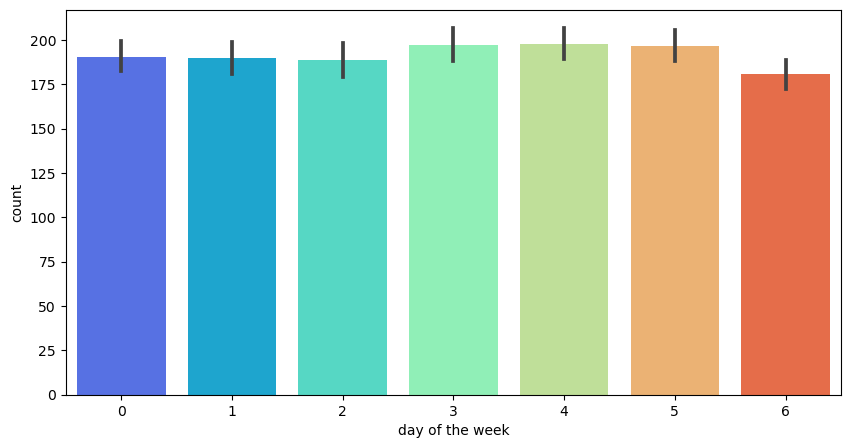

In [19]:
plt.figure(figsize=(10,5))
sns.barplot(data=train_df, x = 'day of the week', y = 'count', palette='rainbow');

**Demand Per Month**

/Users/balamurali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/balamurali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/balamurali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


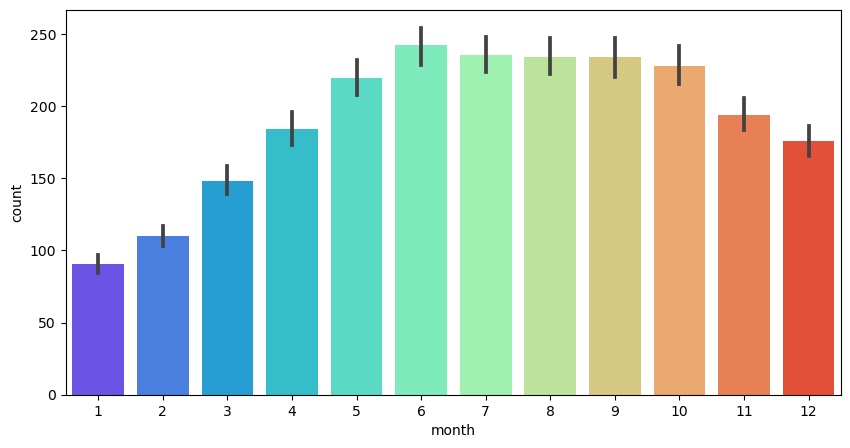

In [20]:
plt.figure(figsize=(10,5))
sns.barplot(data=train_df, x='month', y = 'count', palette = 'rainbow');

**Demand Based on the Hour**

/Users/balamurali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/balamurali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/balamurali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


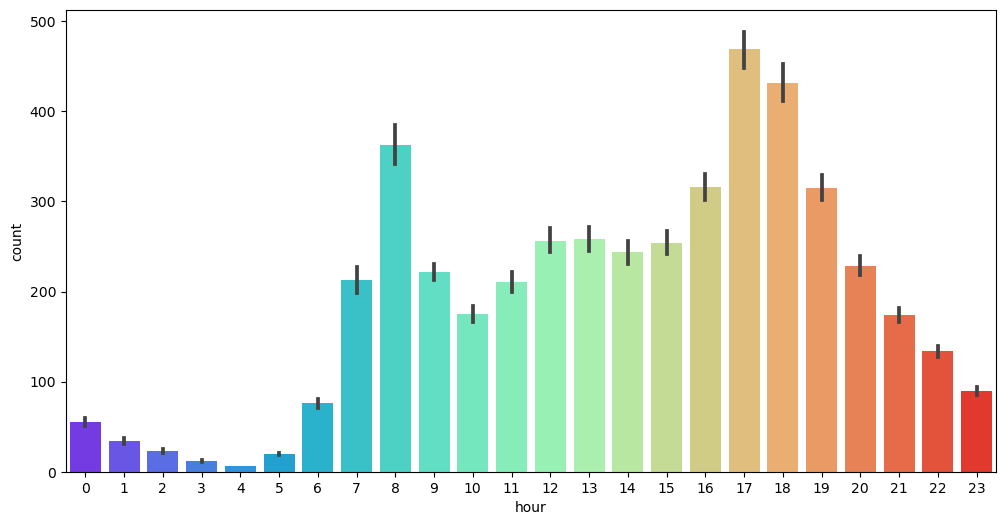

In [21]:
plt.figure(figsize=(12,6))
sns.barplot(data = train_df, x = 'hour', y = 'count', palette = 'rainbow');

**Demand Based on Season**

/Users/balamurali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/balamurali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/balamurali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


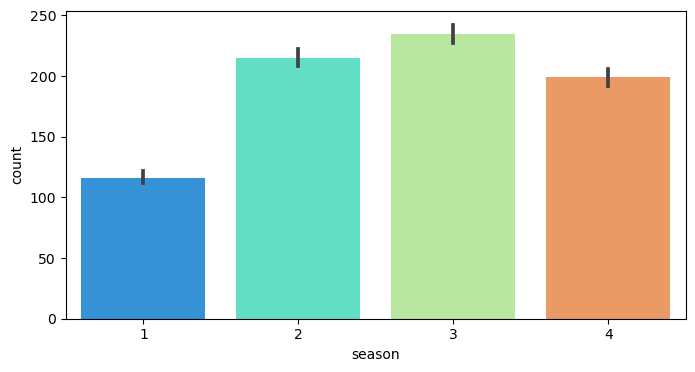

In [22]:
plt.figure(figsize = (8,4))
sns.barplot(data = train_df, x = 'season', y = 'count', palette = 'rainbow');

**Demand based on Holidays and Working Days**

/Users/balamurali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/balamurali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/balamurali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


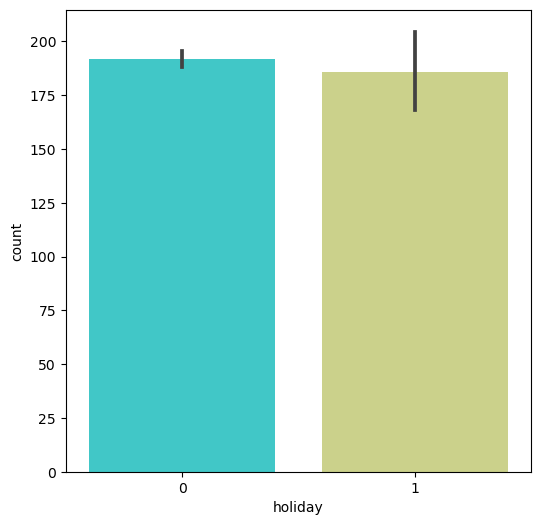

In [23]:
plt.figure(figsize=(6,6))
sns.barplot(data = train_df, x = 'holiday', y = 'count', palette = 'rainbow');

/Users/balamurali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/balamurali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/balamurali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


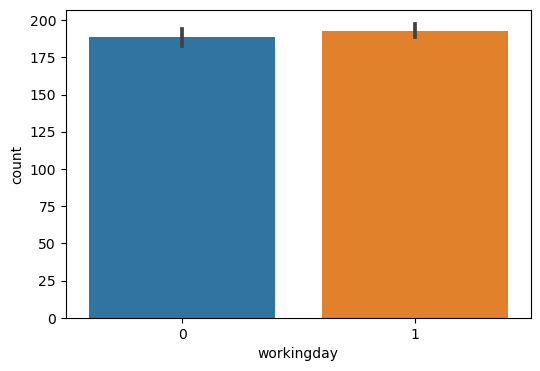

In [24]:
plt.figure(figsize=(6,4))
sns.barplot(data = train_df, x = 'workingday', y = 'count');

# Visualization of the continuous varibles using Histogram

**Continuous features - temp, atemp, humidity, windspeed, count**

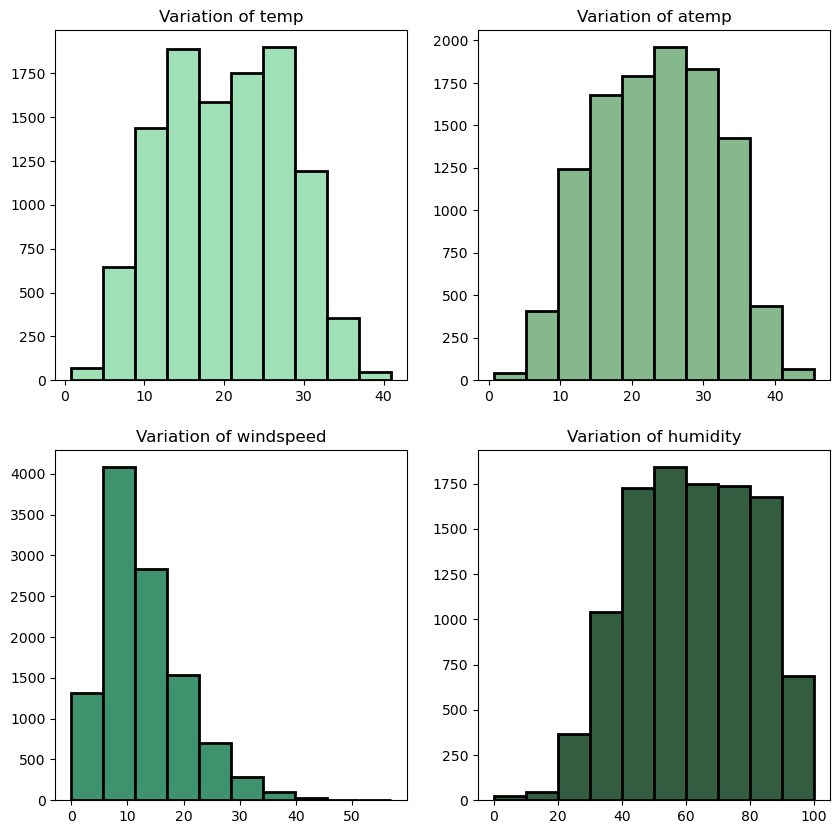

In [25]:
train_df.temp.unique()
fig,axes=plt.subplots(2,2)
axes[0,0].hist(x="temp",data=train_df,edgecolor="black",linewidth=2,color='#a0e0b6')
axes[0,0].set_title("Variation of temp")
axes[0,1].hist(x="atemp",data=train_df,edgecolor="black",linewidth=2,color='#85b98d')
axes[0,1].set_title("Variation of atemp")
axes[1,0].hist(x="windspeed",data=train_df,edgecolor="black",linewidth=2,color='#3e936e')
axes[1,0].set_title("Variation of windspeed")
axes[1,1].hist(x="humidity",data=train_df,edgecolor="black",linewidth=2,color='#335d40')
axes[1,1].set_title("Variation of humidity")
fig.set_size_inches(10,10)

**Demand vs aTemp**

/Users/balamurali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/balamurali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


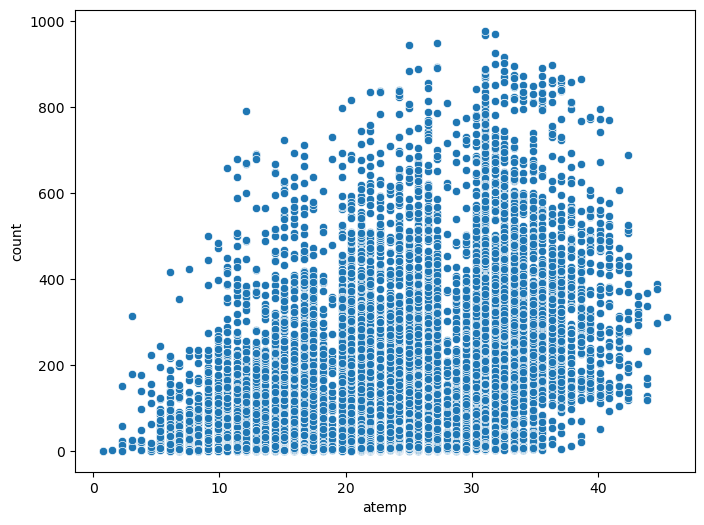

In [26]:
plt.figure(figsize=(8,6))
sns.scatterplot(data = train_df, x = 'atemp', y = 'count');

# Data Preprocessing

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split

# Read the dataset
train_df = pd.read_csv('train.csv')

# Data Preprocessing
date_format = "%d-%m-%Y %H:%M"
train_df['datetime'] = pd.to_datetime(train_df['datetime'], format=date_format)

train_df['year'] = train_df['datetime'].dt.year
train_df['month'] = train_df['datetime'].dt.month
train_df['date'] = train_df['datetime'].dt.date
train_df['hour'] = train_df['datetime'].dt.hour
train_df['day of the week'] = train_df['datetime'].dt.dayofweek

season = pd.get_dummies(train_df['season'], prefix='season', drop_first=True)
weather = pd.get_dummies(train_df['weather'], prefix='weather', drop_first=True)
holiday = pd.get_dummies(train_df['holiday'], prefix='holiday', drop_first=True)
month = pd.get_dummies(train_df['month'], prefix='month', drop_first=True)
hour = pd.get_dummies(train_df['hour'], prefix='hour', drop_first=True)

train_df = pd.concat([train_df, season, weather, holiday, month, hour], axis=1)

train_df.drop(['datetime', 'date', 'day of the week', 'year', 'windspeed', 'workingday', 'season', 'weather', 'holiday', 'month', 'hour'], axis=1, inplace=True)

# Log transform the target variable
y = np.log(train_df['count'])

# Remove the target variable from the feature matrix
X = train_df.drop('count', axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# #Linear Regression

Accuracy (R2): 87.42%
Mean Absolute Error (MAE): 0.36
Mean Squared Error (MSE): 0.29
Root Mean Squared Error (RMSE): 0.53


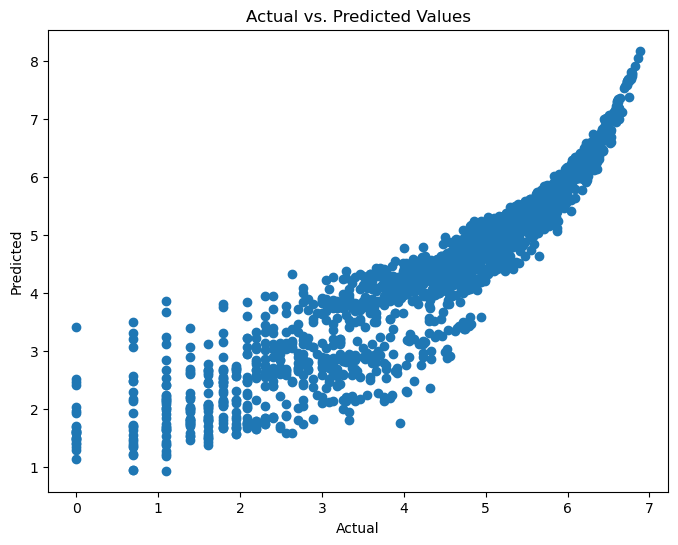

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Now you can make predictions using the model on the test data
y_pred = linear_reg.predict(X_test)

# Calculate the R-squared (R2) score
r2 = r2_score(y_test, y_pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Convert R2 score to a percentage
accuracy_percentage = r2 * 100

print(f"Accuracy (R2): {accuracy_percentage:.2f}%")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Plot the predicted vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()
